In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
#df.iloc[row_start:row_end , col_start, col_end]

In [110]:
name = "CleanerStuff.csv"

In [111]:
RawData = pd.read_csv(name)
RawData.head()

,Ticker,Description,"Change 1h, %","Change 4h, %",Change from Open %,Change %,"Change 1W, %","Change 1M, %",3-Month Performance,6-Month Performance,Yearly Performance,5Y Performance,Sector
0,NKTX,"Nkarta, Inc.",0.621118,0.621118,117.687075,116.216216,107.792208,130.215827,56.862745,-33.054393,-76.154993,-94.155251,Health Technology
1,ASMB,"Assembly Biosciences, Inc.",-0.746324,-0.746324,-8.965517,81.818182,85.654008,49.152542,22.222222,17.857143,-22.352941,-94.529631,Health Technology
2,ANEB,"Anebulo Pharmaceuticals, Inc.",-3.703704,-3.703704,8.837209,36.842105,-4.881915,-23.404255,-7.105994,-20.408163,-13.333333,-68.292683,Health Technology
3,GPAK,Gamer Pakistan Inc.,-0.397189,-0.397189,28.346457,32.520325,22.648608,NaN,-61.190476,-61.190476,-61.190476,-61.190476,Consumer Services
4,MBRX,"Moleculin Biotech, Inc.",1.410236,1.410236,23.076923,30.612245,42.222222,49.707602,3.225806,-19.989999,-38.461538,-92.270531,Health Technology


In [112]:
criteria = RawData.columns.values.tolist()
criteria.pop(0)
criteria.pop(-1)
criteria.pop(0)
normalizedData = pd.DataFrame(RawData.iloc[:,2])
for i in criteria:
    normalizedData[i] = RawData[i]
    
normalizedData = (normalizedData - normalizedData.mean()) / normalizedData.std()
normalizedData.insert(0, column="Description", value= RawData["Description"])
normalizedData.insert(0, column="Ticker", value= RawData["Ticker"])
normalizedData["Sector"] = RawData["Sector"]
normalizedData.head()


,Ticker,Description,"Change 1h, %","Change 4h, %",Change from Open %,Change %,"Change 1W, %","Change 1M, %",3-Month Performance,6-Month Performance,Yearly Performance,5Y Performance,Sector
0,NKTX,"Nkarta, Inc.",0.667380,0.321593,33.770867,30.884094,18.021386,3.826729,2.507561,-0.566049,-0.636452,-0.560146,Health Technology
1,ASMB,"Assembly Biosciences, Inc.",-0.663699,-0.527995,-3.100272,21.638013,14.237776,1.464963,1.255819,0.485281,-0.182936,-0.562280,Health Technology
2,ANEB,"Anebulo Pharmaceuticals, Inc.",-3.542435,-2.365407,2.082463,9.548590,-1.235597,-0.648968,0.196038,-0.304903,-0.106907,-0.412709,Health Technology
3,GPAK,Gamer Pakistan Inc.,-0.323848,-0.311078,7.762000,8.386909,3.469608,NaN,-1.758316,-1.147062,-0.510311,-0.372221,Consumer Services
4,MBRX,"Moleculin Biotech, Inc.",1.435513,0.811870,6.227932,7.874023,6.814908,1.481134,0.569380,-0.296267,-0.318721,-0.549401,Health Technology


In [113]:
Catogories = pd.Series.unique(normalizedData.iloc[ :,-1])
print(Catogories)
criteria = normalizedData.columns.values.tolist()
criteria.pop(0)
criteria.pop(-1)
criteria.pop(0)
print(criteria)

['Health Technology' 'Consumer Services' 'Commercial Services'
 'Electronic Technology' 'Energy Minerals' 'Retail Trade'
 'Producer Manufacturing' 'Finance' 'Technology Services'
 'Consumer Non-Durables' 'Process Industries' 'Consumer Durables'
 'Health Services' 'Industrial Services' 'Transportation' 'Miscellaneous'
 'Non-Energy Minerals' 'Utilities' 'Communications'
 'Distribution Services' 'Government']
['Change 1h, %', 'Change 4h, %', 'Change from Open %', 'Change %', 'Change 1W, %', 'Change 1M, %', '3-Month Performance', '6-Month Performance', 'Yearly Performance', '5Y Performance']


In [114]:
averages = pd.DataFrame()
averages["Catogories"] = Catogories
averages

,Catogories
0,Health Technology
1,Consumer Services
2,Commercial Services
3,Electronic Technology
4,Energy Minerals
5,Retail Trade
6,Producer Manufacturing
7,Finance
8,Technology Services
9,Consumer Non-Durables


In [115]:
#df.iloc[:,2]
for j in criteria:
    temp_list = []
    for i in Catogories:
        temp = normalizedData.loc[normalizedData['Sector'] == i, j].mean()
        temp_list.append(temp)
    averages[j] = temp_list
averages
    

,Catogories,"Change 1h, %","Change 4h, %",Change from Open %,Change %,"Change 1W, %","Change 1M, %",3-Month Performance,6-Month Performance,Yearly Performance,5Y Performance
0,Health Technology,0.008076,0.054704,0.140247,0.214127,0.070091,-0.029302,-0.403443,-0.332460,-0.160387,-0.246999
1,Consumer Services,-0.095715,-0.108169,0.163817,0.130770,0.161229,-0.003370,-0.194496,-0.170615,-0.044022,-0.089116
2,Commercial Services,-0.103645,-0.058544,0.077729,0.076905,0.063189,0.096971,-0.012870,0.006895,-0.044811,-0.071177
3,Electronic Technology,-0.002718,0.108332,0.136165,0.039462,0.143668,-0.009227,-0.222147,0.042997,0.072003,0.329986
4,Energy Minerals,-0.009405,-0.097845,-0.089921,-0.029704,-0.054355,0.069953,0.932093,0.484783,0.080927,0.245636
5,Retail Trade,-0.015909,0.004230,0.392446,0.290134,0.473450,0.000072,0.045506,0.054704,-0.025760,0.119260
6,Producer Manufacturing,-0.076214,-0.054935,0.117972,0.023531,0.091493,-0.001514,0.134497,0.264838,0.182268,0.176309
7,Finance,0.052019,0.046613,-0.058973,0.002838,-0.010544,0.022583,0.197548,0.089506,-0.015770,-0.024538
8,Technology Services,-0.076795,-0.067186,0.185986,0.063364,0.139597,-0.012280,-0.202043,0.103063,0.134654,0.079425
9,Consumer Non-Durables,-0.124614,-0.066065,0.087365,0.144888,0.190452,-0.069730,0.003947,-0.137383,-0.030327,0.225465


<Axes: xlabel='Catogories'>

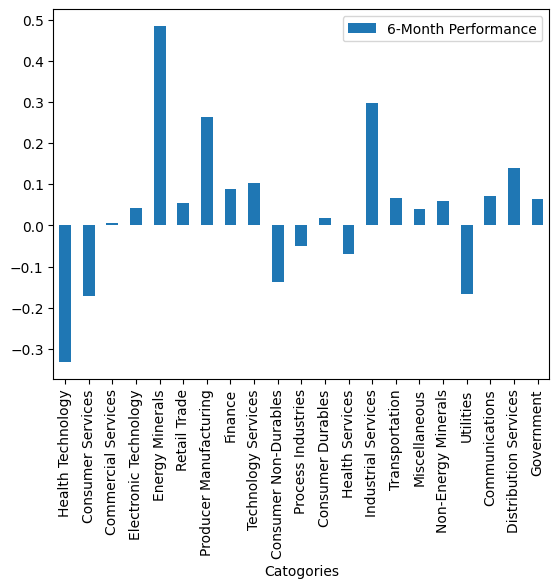

In [116]:
averages.plot(x = "Catogories", y = "6-Month Performance", kind = "bar")